In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# Import API key
from config import weather_api_key

In [3]:
pip install citipy

You should consider upgrading via the 'c:\users\gagans\desktop\bootcamp\bootcamp\scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [6]:
# Output File (CSV)
Output_data_file = "output_data/cities.csv"

In [7]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

#  Perform API Calls

## Perform a weather check on each city using a series of successive API calls.
## Include a print log of each city as it'sbeing processed (with the city number and city name).

In [9]:
print("Beginning Data Retrieval")
print("-------------------------------")

#Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Build query url
endpoint = f"{url}appid={weather_api_key}&units={units}&q="

#Creating the response and store in json
#response = requests.get(url).json()

#Set empty list to hold each city's characteristics
city_name_list = []
cloudiness_list = []
country_list = []
data_list = []
humidity_list = []
lat_list = []
lon_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


#Try to get the city data that is available in the OpenWeather API
for index, city in enumerate (cities, start = 1):
    try:
        response = requests.get(endpoint + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        data_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lon_list.append(response["coord"]["lon"])
        temp_max_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])

        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record{index_counter} of set{set_counter}: {city}")
           
        
    except KeyError:
            print("City not found. Skipping...")
            
print("-----------------------------")
print("Data Retrival Complete")
print("-----------------------------")





Beginning Data Retrieval
-------------------------------
Processing Record1 of set1: okhotsk
City not found. Skipping...
Processing Record2 of set1: punta arenas
Processing Record3 of set1: sarkand
Processing Record4 of set1: mataura
Processing Record5 of set1: kloulklubed
Processing Record6 of set1: bredasdorp
Processing Record7 of set1: severo-kurilsk
Processing Record8 of set1: puerto ayora
Processing Record9 of set1: kapaa
Processing Record10 of set1: kruisfontein
Processing Record11 of set1: santiago del estero
Processing Record12 of set1: murdochville
Processing Record13 of set1: hithadhoo
Processing Record14 of set1: yablonovo
Processing Record15 of set1: ushuaia
Processing Record16 of set1: tuatapere
Processing Record17 of set1: atuona
Processing Record18 of set1: walvis bay
Processing Record19 of set1: sabang
City not found. Skipping...
Processing Record20 of set1: geraldton
Processing Record21 of set1: tura
Processing Record22 of set1: raigarh
Processing Record23 of set1: cap

Processing Record42 of set4: nsanje
Processing Record43 of set4: virginia beach
Processing Record44 of set4: labytnangi
Processing Record45 of set4: faanui
City not found. Skipping...
Processing Record46 of set4: tuktoyaktuk
Processing Record47 of set4: mnogovershinnyy
Processing Record48 of set4: ankazoabo
City not found. Skipping...
Processing Record49 of set4: santa maria
Processing Record50 of set4: chenzhou
Processing Record0 of set5: alice springs
Processing Record1 of set5: ayagoz
Processing Record2 of set5: vestmanna
Processing Record3 of set5: mednogorsk
Processing Record4 of set5: grindavik
Processing Record5 of set5: general roca
Processing Record6 of set5: cassilandia
Processing Record7 of set5: tasiilaq
Processing Record8 of set5: sangar
Processing Record9 of set5: aklavik
Processing Record10 of set5: port alfred
Processing Record11 of set5: clyde river
Processing Record12 of set5: san carlos
Processing Record13 of set5: raha
Processing Record14 of set5: irbil
Processing R

## Convert Raw Data to DataFrame

### Export the city data into a .csv.
### Display the DataFrame

In [10]:
#Creating a dataframe with information received
Weather_pd = pd.DataFrame({
                        "City" : city_name_list, 
                        "Cloudiness" : cloudiness_list,
                        "Country" : country_list,
                        "Date" : data_list,
                        "Humidity" : humidity_list,
                        "Lat" : lat_list,
                        "Lon" : lon_list,
                        "Max Temp" : temp_max_list,
                        "Wind Speed" : wind_speed_list 
    
})



In [11]:
#Counting the data
Weather_pd.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lon           554
Max Temp      554
Wind Speed    554
dtype: int64

In [12]:
#Displaying the DataFrame
Weather_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Okhotsk,0,RU,1603838590,83,59.38,143.30,-1.92,3.81
1,Punta Arenas,0,CL,1603838332,62,-53.15,-70.92,8.00,8.70
2,Sarkand,98,KZ,1603838591,62,45.41,79.92,6.39,1.32
3,Mataura,5,NZ,1603838591,73,-46.19,168.86,13.33,0.89
4,Kloulklubed,83,PW,1603838591,66,7.04,134.26,28.72,1.40


In [16]:
#Export city data into a .CSV file
Weather_pd.to_csv("Output_data_file", index = False)

## Plotting the Data

#### Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#### Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot


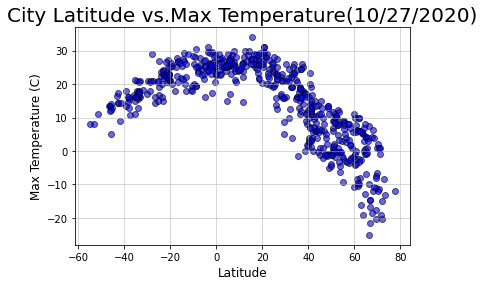

<Figure size 432x288 with 0 Axes>

In [17]:
#Creating the Latitude vs. Temperature Scatter Plot

plt.title("City Latitude vs.Max Temperature(10/27/2020)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Max Temperature (C)", fontsize = 12)

plt.scatter(Weather_pd["Lat"],Weather_pd["Max Temp"], facecolors ="Blue",marker="o",edgecolor="black",alpha=.6)
plt.grid(linestyle="-", linewidth = 1, alpha = .5)
plt.show()

plt.savefig("../Images/City Latitude vs.Max Temperature.png")

## Latitude vs. Humidity Plot

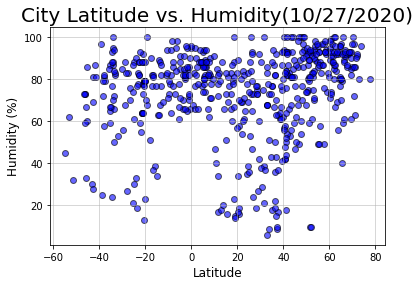

<Figure size 432x288 with 0 Axes>

In [18]:
#Creating the Latitude vs. Humidity Scatter Plot

plt.title("City Latitude vs. Humidity(10/27/2020)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Humidity (%)", fontsize = 12)

plt.scatter(Weather_pd["Lat"],Weather_pd["Humidity"], facecolors ="Blue",marker="o",edgecolor="black",alpha=.6)
plt.grid(linestyle="-", linewidth = 1, alpha = .5)
plt.show()

plt.savefig("../Images/City Latitude vs.Humidity.png")

##  Latitude vs. Cloudiness Plot

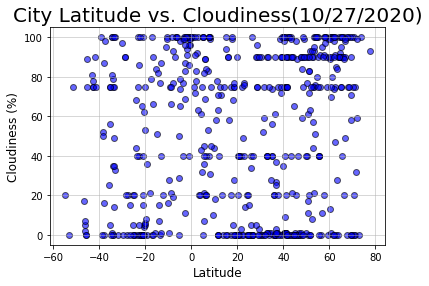

<Figure size 432x288 with 0 Axes>

In [19]:
#Creating the Latitude vs. Cloudiness Scatter Plot

plt.title("City Latitude vs. Cloudiness(10/27/2020)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Cloudiness (%)", fontsize = 12)

plt.scatter(Weather_pd["Lat"],Weather_pd["Cloudiness"], facecolors ="Blue",marker="o",edgecolor="black",alpha=.6)
plt.grid(linestyle="-", linewidth = 1, alpha = .5)
plt.show()

plt.savefig("../Images/City Latitude vs.Cloudiness.png")

## Latitude vs. Wind Speed Plot

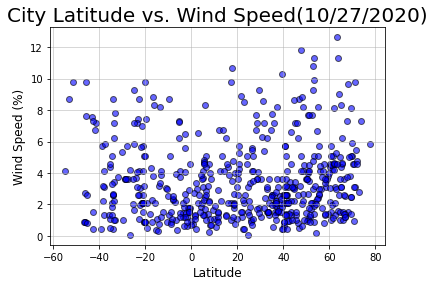

<Figure size 432x288 with 0 Axes>

In [20]:
#Creating the Latitude vs. Wind Speed Scatter Plot

plt.title("City Latitude vs. Wind Speed(10/27/2020)", fontsize = 20)
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Wind Speed (%)", fontsize = 12)

plt.scatter(Weather_pd["Lat"],Weather_pd["Wind Speed"], facecolors ="Blue",marker="o",edgecolor="black",alpha=.6)
plt.grid(linestyle="-", linewidth = 1, alpha = .5)
plt.show()

plt.savefig("../Images/City Latitude vs.Wind Speed.png")

#  Linear Regression

In [21]:
#Creating DataFrame for Northern Henisphere and Southern Hemisphere
southern_hemisphere = Weather_pd.loc[Weather_pd["Lat"]<0]
northern_hemisphere = Weather_pd.loc[Weather_pd["Lat"]>=0]

##  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

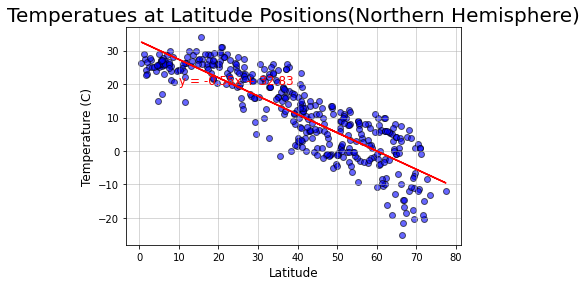

<Figure size 432x288 with 0 Axes>

In [22]:

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.title("Temperatues at Latitude Positions(Northern Hemisphere)", fontsize = 20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10,20), fontsize = 12, color = "red")
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Temperature (C)", fontsize = 12)

plt.scatter(x_values,y_values, facecolors ="Blue",marker="o",edgecolor="black",alpha=.6)
plt.grid(linestyle="-", linewidth = 1, alpha = .5)
plt.show()

plt.savefig("../Images/Temperatues at Latitude Positions(Northern Hemisphere.png")

##  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

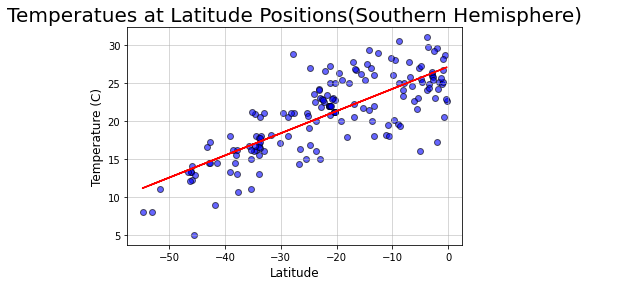

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.title("Temperatues at Latitude Positions(Southern Hemisphere)", fontsize = 20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10,20), fontsize = 12, color = "red")
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Temperature (C)", fontsize = 12)
plt.xlim = (0, -60)
plt.ylim = (40, 100)

plt.scatter(x_values,y_values, facecolors ="Blue",marker="o",edgecolor="black",alpha=.6)
plt.grid(linestyle="-", linewidth = 1, alpha = .5)
plt.show()

plt.savefig("../Images/Temperatues at Latitude Positions(Southern Hemisphere.png")

## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

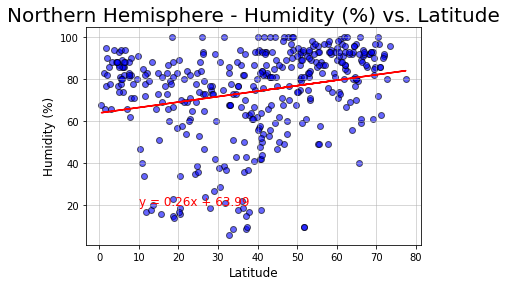

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude", fontsize = 20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10,20), fontsize = 12, color = "red")
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Humidity (%)", fontsize = 12)

plt.scatter(x_values,y_values, facecolors ="Blue",marker="o",edgecolor="black",alpha=.6)
plt.grid(linestyle="-", linewidth = 1, alpha = .5)
plt.show()

plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude.png")

##  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

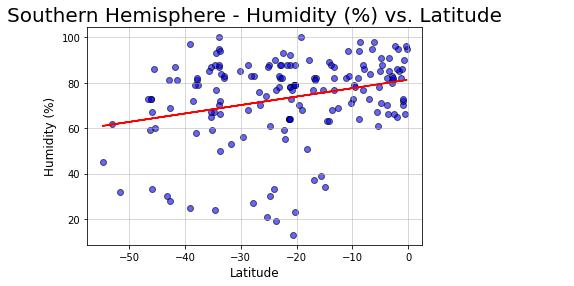

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude", fontsize = 20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10,20), fontsize = 12, color = "red")
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Humidity (%)", fontsize = 12)

plt.scatter(x_values,y_values, facecolors ="Blue",marker="o",edgecolor="black",alpha=.6)
plt.grid(linestyle="-", linewidth = 1, alpha = .5)
plt.show()

plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude.png")

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

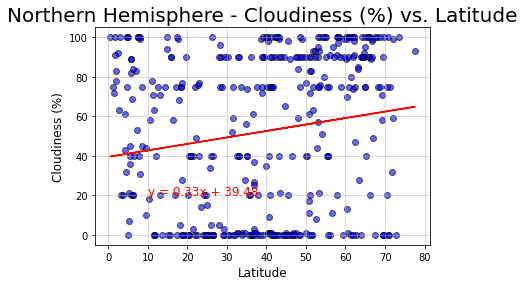

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude", fontsize = 20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10,20), fontsize = 12, color = "red")
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Cloudiness (%)", fontsize = 12)

plt.scatter(x_values,y_values, facecolors ="Blue",marker="o",edgecolor="black",alpha=.6)
plt.grid(linestyle="-", linewidth = 1, alpha = .5)
plt.show()

plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

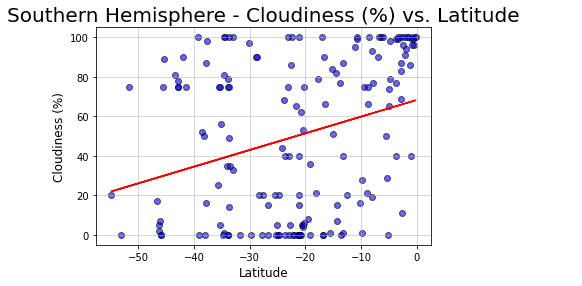

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude", fontsize = 20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10,20), fontsize = 12, color = "red")
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Cloudiness (%)", fontsize = 12)

plt.scatter(x_values,y_values, facecolors ="Blue",marker="o",edgecolor="black",alpha=.6)
plt.grid(linestyle="-", linewidth = 1, alpha = .5)
plt.show()

plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

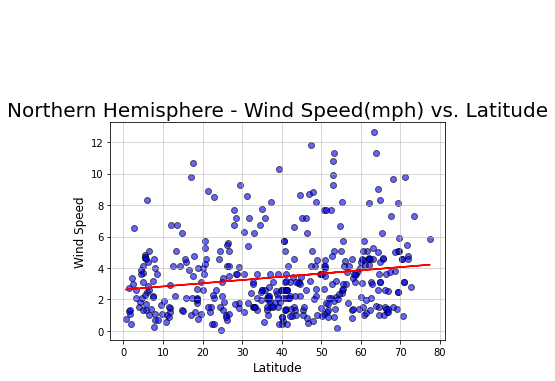

<Figure size 432x288 with 0 Axes>

In [29]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude", fontsize = 20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10,20), fontsize = 12, color = "red")
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Wind Speed", fontsize = 12)

plt.scatter(x_values,y_values, facecolors ="Blue",marker="o",edgecolor="black",alpha=.6)
plt.grid(linestyle="-", linewidth = 1, alpha = .5)
plt.show()

plt.savefig("../Images/Northern Hemisphere - Wind Speed(mph) vs. Latitude.png")

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

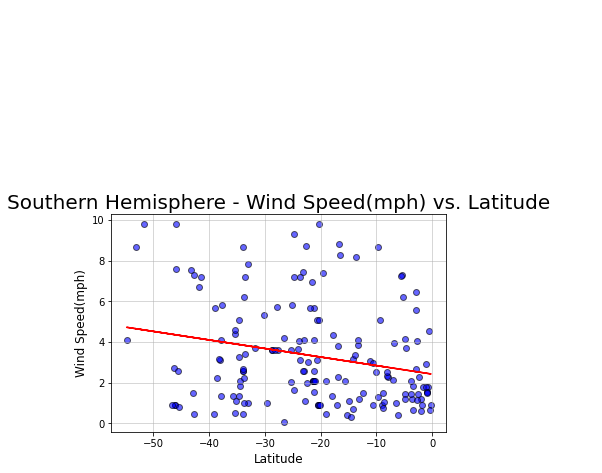

<Figure size 432x288 with 0 Axes>

In [30]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude", fontsize = 20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (10,20), fontsize = 12, color = "red")
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Wind Speed(mph)", fontsize = 12)

plt.scatter(x_values,y_values, facecolors ="Blue",marker="o",edgecolor="black",alpha=.6)
plt.grid(linestyle="-", linewidth = 1, alpha = .5)
plt.show()

plt.savefig("../Images/Southern Hemisphere - Wind Speed(mph) vs. Latitude.png")